In [24]:
%matplotlib notebook
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [25]:
track=[
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0]]
track = np.array(track)

In [26]:
height,width = track.shape
# defining possible stable states
starting_points=[]
for i in range(width - 1):
    if track[height-1,i]==1:
        starting_points.append([height-1,i])
starting_points = np.array(starting_points)
#defining possible final states
ending_points=[]
for i in range(7):
    ending_points.append([i+1,width - 1])
ending_points = np.array(ending_points)
# defining actions and fixed behavior policy
actions = np.array([[0,0],[-1,-1],[-1,0],[-1,1],[0,-1],[0,1],[1,-1],[1,0],[1,1]])
actionProb = [0.1, 0.1125, 0.1125,.1125,.1125,.1125,.1125,.1125,.1125]

In [27]:
# restart function for out of bounds trajectories
def restart(state):
    state[1] = np.zeros(2)
    state[0] = random.choice(starting_points)
# execution of behavior policy at state = [[x,y],[vx,vy]]
def behavior(state):
    steps = []
    while True:
        index = np.random.choice(np.arange(0,9), p=actionProb)
        state[1] = state[1] + actions[index]
        if state[1,0] > 0:
            state[1,0] = 0
        if state[1,0] < -5:
            state[1,0] = -5
        if state[1,1] < 0:
            state[1,1] = 0
        if state[1,1] > 5:
            state[1,1] = 5
        state[0] = state[0] + state[1]
        if any((state[0] == x).all() for x in ending_points):
            steps.append([list(state[0]),index,0])
            break
        elif np.logical_or(*(list(state[0] < np.array([0,0])))) or np.logical_or(*(list(state[0] > np.array([height - 1,width - 1])))) or track[tuple(state[0])] == 0:
            restart(state)
        steps.append([list(state[0]),index,-1])
    steps.append((_,_,-1))
    return steps
# main loop
def run(n):
    count = 0
    while True:
        state = np.array([random.choice(starting_points),np.array([0,0])])
        episode = behavior(state)
        g = 0
        w = 1
        for t in range(len(episode)-2,-1,-1):
            x = episode[t][0][0]
            y = episode[t][0][1]
            a = episode[t][1] 
            g += episode[t+1][2]
            c[(x,y,a)] += w 
            before = q[x,y,a]
            new = (before+(w*(g - before)/c[x,y,a]))
            q[x,y,a] = new
            pi[x,y] = np.argmax(q[x,y])
        count += 1
        if count%100 == 0:
            print(count)
        if count == n:
            break
# print function
def prettyPrint(data, zlabel='reward'):
    figureIndex = 0
    fig = plt.figure(figureIndex)
    ax = fig.add_subplot(111, projection='3d')
    axisX = []
    axisY = []
    axisZ = []
    for i in range(height):
        for j in range(width):
            axisX.append(i)
            axisY.append(j)
            axisZ.append(data[i,j])
    ax.scatter(axisX, axisY, axisZ)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel(zlabel)

In [34]:
# initialize arrays
q = np.zeros((height, width, 9))
c = np.zeros((height, width, 9))
pi = np.empty((height,width))
# initialize policy
for index,value in np.ndenumerate(pi):
    pi[index] = np.argmax(q[index])
# run 1000 episodes
run(5000)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000


<IPython.core.display.Javascript object>


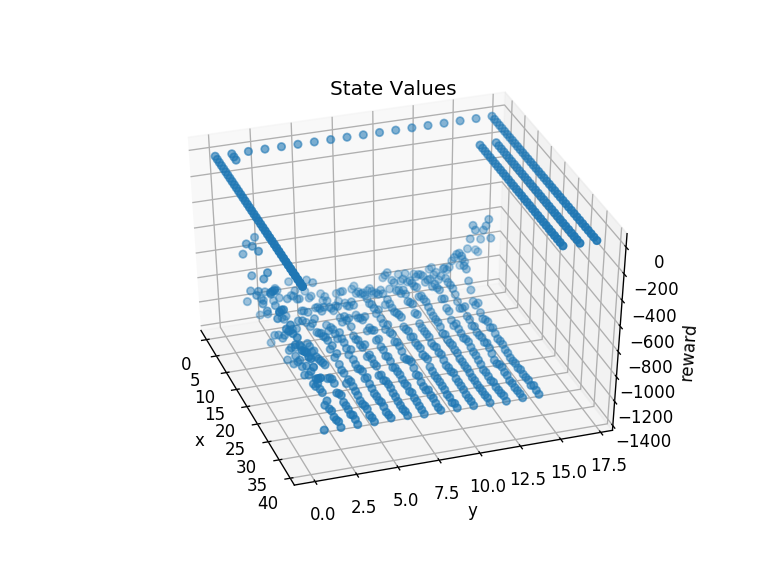

In [35]:
prettyPrint(np.mean(q,axis=2))
plt.title('State Values')
plt.show()

In [39]:
# saving arrays to file
arrays = open('arrays','wb')
np.savez(arrays,q,c,pi)